## Objective

We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2016&ndash;2018. The dataset includes three columns:  

|date|number_of_strikes|center_point_geom|
|---|---|---|  

The objective is to assign the monthly number of strikes to the following categories: mild, scattered, heavy, or severe. Then we will create a heatmap of the three years so we can get a high-level understanding of monthly lightning severity from a simple diagram.   

A heat map uses colors to depict the magnitude of an instance or set of values. Heat maps are a type of data visualization that is useful for showing the concentration of values between different data points.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as pe

In [3]:
path = '/home/gato/Scripts/DS/DataIntoInsights/data/Data_week_3/eda_label_encoding_dataset.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


In [7]:
## Transform date column to date time object

df['date'] = pd.to_datetime(df['date'])

## Create a month column with the first 3 letters of the month

df['month'] = df['date'].dt.month_name().str.slice(stop=3)

## the Months in order so we can have them in the Gregorian order

meses = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec'
]

df['month'] = pd.Categorical(df['month'], categories = meses, ordered = True)
df['year'] = df['date'].dt.strftime('%Y')

df_by_month = df.groupby(['year', 'month']).sum().reset_index()
df_by_month.head(10)

,year,month,number_of_strikes
0,2016,Jan,313595
1,2016,Feb,312676
2,2016,Mar,2057527
3,2016,Apr,2636427
4,2016,May,5800500
5,2016,Jun,6647930
6,2016,Jul,10661475
7,2016,Aug,7250442
8,2016,Sep,3931903
9,2016,Oct,1285451


Creating a column for categorical variables called strike level. 
In this column, we will group or bucket the total number of strikes into categories Mild, scattered, Heavy, and Severe. 

This is how we perform label encoding in python. To do this will create a new column in R df by month data frame called strike level. This new column will be coded using the pandas function qcut the queue in this function refers to quantiles. 

Meaning that when using these pandas function, you can cut the data into four equal quantized. First parameters, we first input the desired column we want to cut into quantiles, which will be the column called number of strikes. Then 
we input the number of quantiles we want, which is 41 for each classification. We type in those classifications under the label parameter, Mild, scattered Heavy, and Severe. Let's use the head function to find out how our code modified the data frame df by month.

In [10]:
df_by_month['strike_level'] = pd.qcut(
    df_by_month['number_of_strikes'], 
    4, 
    labels = ['Mild', 'Scattered', 'Heavy', 'Severe'])
df_by_month.head(10)

,year,month,number_of_strikes,strike_level
0,2016,Jan,313595,Mild
1,2016,Feb,312676,Mild
2,2016,Mar,2057527,Scattered
3,2016,Apr,2636427,Heavy
4,2016,May,5800500,Severe
5,2016,Jun,6647930,Severe
6,2016,Jul,10661475,Severe
7,2016,Aug,7250442,Severe
8,2016,Sep,3931903,Heavy
9,2016,Oct,1285451,Scattered


Cat codes is a pen dysfunction that takes categories and assigns them a numeric code. In this case, when we run the cell we find that mild has been assigned a 0, scattered assigned a 1, heavy a 2, and severe a 3. 

In [11]:
## And Assigning numerical values to the strike levels.
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,313595,Mild,0
1,2016,Feb,312676,Mild,0
2,2016,Mar,2057527,Scattered,1
3,2016,Apr,2636427,Heavy,2
4,2016,May,5800500,Severe,3
5,2016,Jun,6647930,Severe,3
6,2016,Jul,10661475,Severe,3
7,2016,Aug,7250442,Severe,3
8,2016,Sep,3931903,Heavy,2
9,2016,Oct,1285451,Scattered,1


 One other helpful way to work with categorical data is to create dummy variables to represent those categories. 
 
 dummy variables are variables with values of 0 or 1, which indicate the presence or absence of something. The pandas function will use to achieve this in our python notebooks is called get dummies. To clarify, new columns of ones and zeros are also known as dummies. The get_dummies function converts these categorical variables, mild, scattered, heavy, and severe into numerical or dummy variables from the column called strike level. If we run the cell, you'll find this function creates four new columns and puts a one in any row where the number of lightning strikes falls into the labeled category, and a zero for anything else. 


In [13]:
## Creating the dummy variables

pd.get_dummies(df_by_month['strike_level'])

,Mild,Scattered,Heavy,Severe
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,1,0
9,0,1,0,0


The objective is to assign the monthly number of strikes to the following categories: mild, scattered, heavy, or severe. Then we will create a heatmap of the three years so we can get a high-level understanding of monthly lightning severity from a simple diagram.   

Now that we have our new columns of categorical data, numeric data, and dummy variables, let's discover what you can potentially learn from these groupings. To do that, let's plot our data. We'll first create a data frame called df_by_month_plot. Let's reshape the data by using the pandas function, pivot. 

Pivot allows us to reshape our data frame into any given index or set of values we want based on the parameters inside the pivot function. 
Those parameters are index columns and values in that order. 

To help us with the visualization, let's use year in the index field, month in the columns field, and strike level code in the values field. 
If we use our head function, we find all three years in the rows, the months in the columns and the strike level categories in each month, just like we coded. 

In [14]:
df_by_month_plot =  df_by_month.pivot('year', 'month', 'strike_level_code')
df_by_month_plot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,0,0,1,2,3,3,3,3,2,1,0,0
2017,1,0,1,2,2,2,3,3,2,1,0,0
2018,1,2,1,1,2,3,3,3,2,1,0,0


To help us with the visualization, let's use year in the index field, month in the columns field, and strike level code in the values field. 
If we use our head function, we find all three years in the rows, the months in the columns and the strike level categories in each month, just like we coded. 
A heatmap, will show where most of the lightning strike values are. A heatmap is a type of data visualization that depicts the magnitude of an instance or set of values based on two colors. It is a very valuable chart for showing the concentration of values between two different points. 


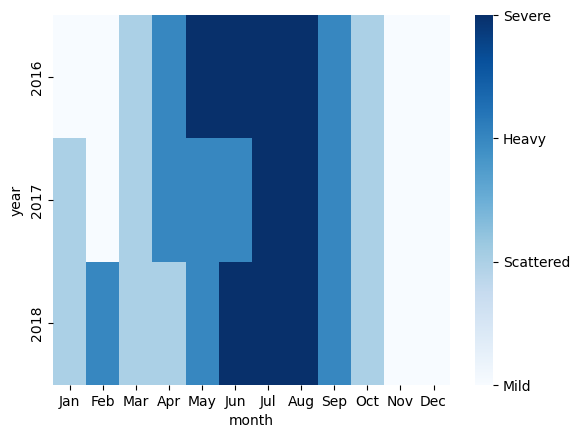

In [16]:
## Heatmap showing wich months over the years had most severe lightning

ax = sns.heatmap(df_by_month_plot, cmap = 'Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()

The heatmap indicates that for all three years, the most lightning strikes occurred during the summer months. A heatmap is an easily digestable way to understand a lot of data in a single graphic.  